In [1]:
!pip install dlib


     ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
      --------------------------------------- 0.1/3.3 MB 1.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.2/3.3 MB 2.9 MB/s eta 0:00:02
     ------- -------------------------------- 0.6/3.3 MB 4.4 MB/s eta 0:00:01
     -------------- ------------------------- 1.2/3.3 MB 6.7 MB/s eta 0:00:01
     --------------------------- ------------ 2.3/3.3 MB 10.2 MB/s eta 0:00:01
     ---------------------------------------- 3.3/3.3 MB 13.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build dlib


  error: subprocess-exited-with-error
  
  × Building wheel for dlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [9 lines of output]
      <string>:210: SyntaxWarning: invalid escape sequence '\('
      <string>:211: SyntaxWarning: invalid escape sequence '\('
      <string>:212: SyntaxWarning: invalid escape sequence '\('
      running bdist_wheel
      running build
      running build_ext
      
      ERROR: CMake must be installed to build dlib
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (dlib)


In [2]:

# !pip install opencv-python
!pip install scipy
!pip install scikit-image

In [3]:
!pip install imutils
#imutils對OpenCV函數進行二次封裝，執行基本任務，如平移、旋轉、調整大小和骨架提取。但必須已安裝numpy,matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=710e13947c2e846fa61def351fe52e776f3ab83ef080c9688bd053e2b6971b6c
  Stored in directory: c:\users\elsa\appdata\local\pip\cache\wheels\5b\76\96\ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils


### 偵測1

In [4]:
import dlib
import cv2
import imutils
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'dlib'

In [ ]:

# 讀取圖檔
img = cv2.imread('Trump.jpg')

# 縮小圖片
img = imutils.resize(img, width=1280)

# Dlib 的人臉偵測器
detector = dlib.get_frontal_face_detector()

# 偵測人臉
face_rects = detector(img, 0)

# 取出所有偵測的結果
for i, d in enumerate(face_rects):
  x1 = d.left()
  y1 = d.top()
  x2 = d.right()
  y2 = d.bottom()

# 以方框標示偵測的人臉
  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 4, cv2.LINE_AA)

# 顯示結果
#cv2.imshow("Face Detection", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

### 偵測2

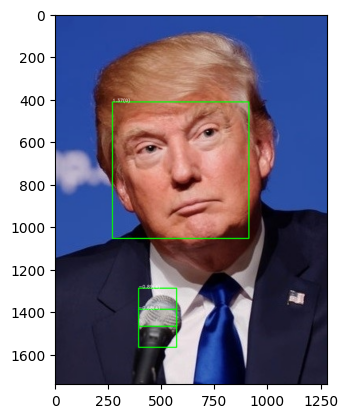

In [2]:
import dlib
import cv2
import imutils
import matplotlib.pyplot as plt

img = cv2.imread('Trump.jpg')
img = imutils.resize(img, width=1280)
detector = dlib.get_frontal_face_detector()

# 偵測人臉，輸出分數
face_rects, scores, idx = detector.run(img, 0, -1)

for i, d in enumerate(face_rects):
  x1 = d.left()
  y1 = d.top()
  x2 = d.right()
  y2 = d.bottom()
  text = "%2.2f(%d)" % (scores[i], idx[i])

  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 4, cv2.LINE_AA)

  # 標示分數
  cv2.putText(img, text, (x1, y1), cv2.FONT_HERSHEY_DUPLEX,
          0.7, (255, 255, 255), 1, cv2.LINE_AA)

#cv2.imshow("Face Detection", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

### 影片人臉偵測

In [ ]:
import dlib
import cv2
import imutils
import matplotlib.pyplot as plt

# 開啟影片檔案
cap = cv2.VideoCapture('hamilton_clip.mp4')

# 取得畫面尺寸
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 使用 XVID 編碼
fourcc = cv2.VideoWriter_fourcc(*'XVID')

# 建立 VideoWriter 物件，輸出影片至 output.avi，FPS 值為 20.0
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (width, height))

# Dlib 的人臉偵測器
detector = dlib.get_frontal_face_detector()

# 以迴圈從影片檔案讀取影格，並顯示出來
while(cap.isOpened()):
  ret, frame = cap.read()

  # 偵測人臉
  face_rects, scores, idx = detector.run(frame, 0)

  # 取出所有偵測的結果
  for i, d in enumerate(face_rects):
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    text = "%2.2f(%d)" % (scores[i], idx[i])

    # 以方框標示偵測的人臉
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 4, cv2.LINE_AA)

    # 標示分數
    cv2.putText(frame, text, (x1, y1), cv2.FONT_HERSHEY_DUPLEX,
            0.7, (255, 255, 255), 1, cv2.LINE_AA)

  # 寫入影格
  out.write(frame)

# 顯示結果
#cv2.imshow("Face Detection", frame)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

if cv2.waitKey(0) & 0xFF == ord('q'):
  break

cap.release()
out.release()
cv2.destroyAllWindows()

### 即時串流影像人臉偵測

In [ ]:
import dlib
import cv2
import imutils

# 開啟影片檔案
cap = cv2.VideoCapture(0)

# Dlib 的人臉偵測器
detector = dlib.get_frontal_face_detector()

# 以迴圈從影片檔案讀取影格，並顯示出來
while(cap.isOpened()):
  ret, frame = cap.read()

  # 偵測人臉
  face_rects, scores, idx = detector.run(frame, 0)

  # 取出所有偵測的結果
  for i, d in enumerate(face_rects):
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    text = "%2.2f(%d)" % (scores[i], idx[i])

    # 以方框標示偵測的人臉
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 4, cv2.LINE_AA)

    # 標示分數
    cv2.putText(frame, text, (x1, y1), cv2.FONT_HERSHEY_DUPLEX,
            0.7, (255, 255, 255), 1, cv2.LINE_AA)

  # 顯示結果
  cv2.imshow("Face Detection", frame)

  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()